In [1]:
from data import load_data, GS_Dataset, make_gs_dataset
from model import Narx, DEVICE
from util_fun import train_narx_simval, narx_sim_nrms
import torch
import matplotlib.pyplot as plt
import numpy as np


In [11]:
n_a=15
n_b=15
n_nodes=50
n_layers=5 
N_EPOCHS=15000

In [3]:
testie=torch.load('trained_best_sim_narx_7K')

In [4]:
testie.keys()

odict_keys(['layers.0.weight', 'layers.0.bias', 'layers.2.weight', 'layers.2.bias', 'layers.4.weight', 'layers.4.bias', 'layers.6.weight', 'layers.6.bias', 'layers.8.weight', 'layers.8.bias'])

In [6]:
model=Narx(n_a+n_b,n_nodes, n_layers).to(DEVICE)
model.load_state_dict(torch.load('trained_best_sim_narx_7K'))

In [12]:
x_data, y_data= load_data()
data = make_gs_dataset(x_data, y_data, n_a, n_b, DEVICE)

In [13]:
results = train_narx_simval(model, n_a, n_b, data, n_epochs=N_EPOCHS)

Checkpoint at epoch 1:  

current pred NRMS: 0.938942396355041, previous best pred NRMS: inf 

current sim NRMS: 0.9382357754715301, previous best sim NRMS: inf 

Checkpoint at epoch 2:  

current pred NRMS: 0.8891415989290771, previous best pred NRMS: 0.938942396355041 

current sim NRMS: 0.8884706049060813, previous best sim NRMS: 0.9382357754715301 

Checkpoint at epoch 3:  

current pred NRMS: 0.8398509207803484, previous best pred NRMS: 0.8891415989290771 

current sim NRMS: 0.8392583535105403, previous best sim NRMS: 0.8884706049060813 

Checkpoint at epoch 4:  

current pred NRMS: 0.7924198344171673, previous best pred NRMS: 0.8398509207803484 

current sim NRMS: 0.79170008361619, previous best sim NRMS: 0.8392583535105403 

Checkpoint at epoch 5:  

current pred NRMS: 0.7499708007806781, previous best pred NRMS: 0.7924198344171673 

current sim NRMS: 0.7522811325409191, previous best sim NRMS: 0.79170008361619 

Checkpoint at epoch 6:  

current pred NRMS: 0.7460114034007332, p

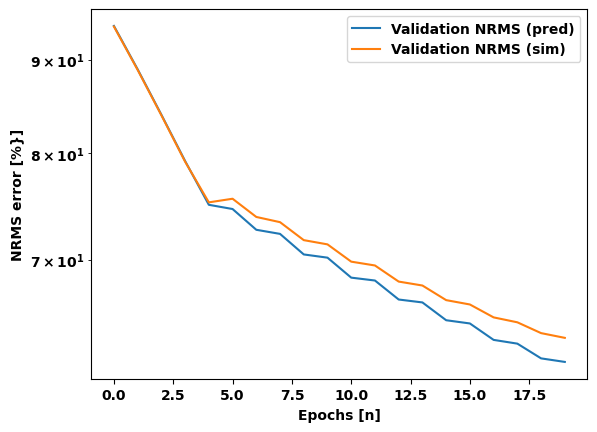

In [14]:
plt.semilogy(np.array(results.nrms_list)*100,label='Validation NRMS (pred)')
plt.semilogy(np.array(results.sim_nrms_list)*100,label='Validation NRMS (sim)')
plt.ylabel('NRMS error [%}]')
plt.xlabel('Epochs [n]')
plt.legend()

In [15]:
torch.save(model.state_dict(),'trained_best_narx_15K')

In [16]:
_,_,_,nrms=narx_sim_nrms(model, n_a, n_b, x_data, y_data, DEVICE, 5000)
f'NRMS: {nrms*100}%'

RuntimeError: CUDA error: invalid device ordinal
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.
